### Taller 5

In [258]:
import numpy as np
import pandas as pd

In [259]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )
df=df.dropna()

In [260]:
df.head

<bound method NDFrame.head of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

Coficicación de las variables cualitativas

In [261]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

Separamos los datos de entrenamiento y prueba

In [262]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Etiquetas

In [263]:
train_X = train[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
test_X = test[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [264]:
train_X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [265]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [266]:
norm = tf.keras.layers.Normalization()

In [267]:
norm.adapt(np.array(train_X))

### Creación del modelo

In [268]:
modelo0 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [269]:
modelo0.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [270]:
%%time
history = modelo0.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 19.1744 - val_loss: 8.3378
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9707 - val_loss: 4.1531
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9554 - val_loss: 3.0072
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5196 - val_loss: 3.3421
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.4649 - val_loss: 2.7782
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9589 - val_loss: 2.8059
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0334 - val_loss: 2.9706
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1945 - val_loss: 2.9710
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2405 - val_loss: 2.6237
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0383 - val_loss: 3.2737
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5138 - val_loss: 2.6841
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1873 - val_loss: 3.1910


In [271]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'Model_0'

In [272]:
hist.head()

,loss,val_loss,epoch,model
0,15.312012,8.337836,0,Model_0
1,6.157411,4.153075,1,Model_0
2,3.816259,3.007154,2,Model_0
3,3.540359,3.342128,3,Model_0
4,3.327655,2.778179,4,Model_0


In [273]:
import matplotlib.pyplot as plt

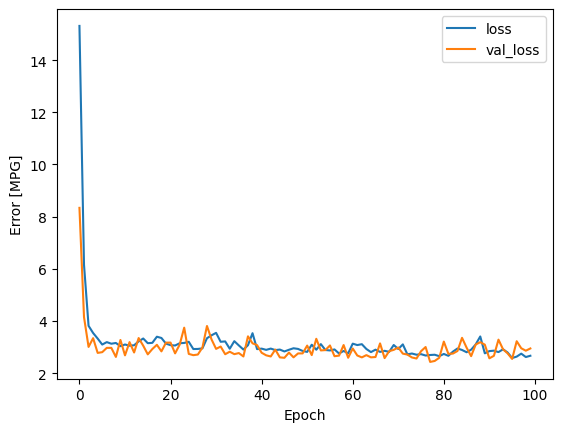

In [274]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [275]:
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Normalization(),  # Suponiendo que 'norm' es una capa de normalización
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

dnn_model.build(input_shape=(None, 4))  # Especificamos que la entrada tiene 4 características
dnn_model.summary()


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ (None, 4)              │             9 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (812.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 9 (40.00 B)

creación de 3 casos diferentes al modelo base

Modelo 1

In [276]:
model3_1 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])


In [277]:
model3_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [278]:
%%time
history31 = model3_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 20.9030 - val_loss: 6.2142
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.6835 - val_loss: 5.1989
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1791 - val_loss: 4.0510
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6757 - val_loss: 3.0284
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.3760 - val_loss: 2.8418
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0922 - val_loss: 3.1068
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0463 - val_loss: 2.8391
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9597 - val_loss: 3.1618
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1829 - val_loss: 2.8526
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0476 - val_loss: 2.6934
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1788 - val_loss: 3.2755
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8159 - val_loss: 3.1871


In [279]:
hist1 = pd.DataFrame(history31.history)
hist1['epoch'] = history31.epoch
hist1['model'] = 'Model_1'

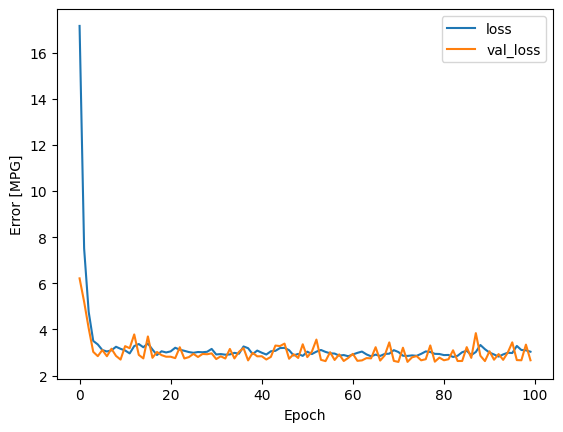

In [280]:
plt.plot(history31.history['loss'], label='loss')
plt.plot(history31.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 2

In [281]:
model3_2 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [282]:
model3_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [283]:
%%time
history32 = model3_2.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 18.4791 - val_loss: 9.4101
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.4381 - val_loss: 4.6718
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0018 - val_loss: 3.6598
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7490 - val_loss: 2.7989
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0013 - val_loss: 2.8426
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1650 - val_loss: 2.8411
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0429 - val_loss: 3.0114
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1747 - val_loss: 3.1429
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1707 - val_loss: 3.2475
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2675 - val_loss: 3.0547
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9589 - val_loss: 2.7512
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8777 - val_l

In [284]:
hist2 = pd.DataFrame(history32.history)
hist2['epoch'] = history32.epoch
hist2['model'] = 'Model_2'

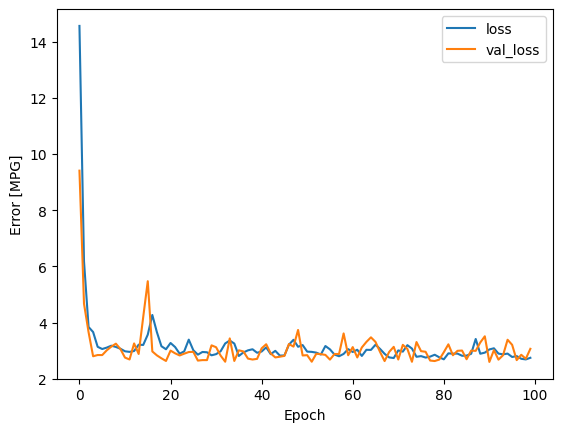

In [285]:
plt.plot(history32.history['loss'], label='loss')
plt.plot(history32.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 3

In [286]:
model3_3 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [287]:
model3_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [288]:
%%time
history33 = model3_3.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 16.9310 - val_loss: 7.8471
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2749 - val_loss: 3.5465
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5568 - val_loss: 3.2000
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3953 - val_loss: 2.7949
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1712 - val_loss: 3.2931
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0778 - val_loss: 2.6240
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9296 - val_loss: 3.0685
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1362 - val_loss: 3.0386
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1521 - val_loss: 3.4321
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.4280 - val_loss: 2.9388
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3494 - val_loss: 3.3188
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.2652 - val_l

In [289]:
hist3 = pd.DataFrame(history33.history)
hist3['epoch'] = history33.epoch
hist3['model'] = 'Model_3'

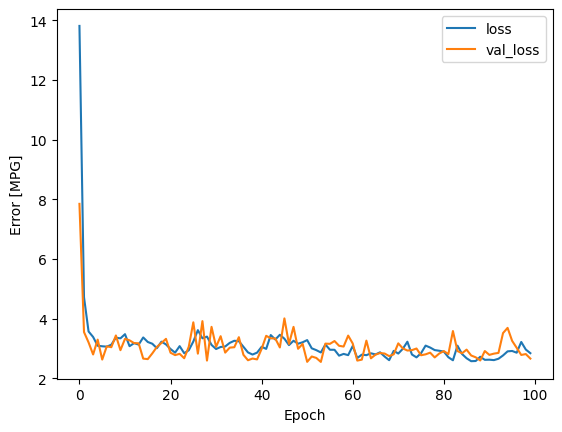

In [290]:
plt.plot(history33.history['loss'], label='loss')
plt.plot(history33.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [291]:
hist_t = pd.concat([hist,hist1,hist2,hist3], ignore_index=True)

In [292]:
import seaborn as sns


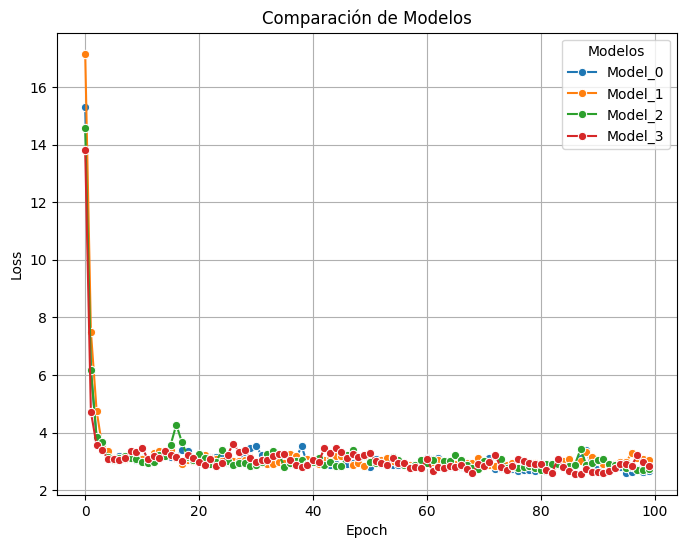

In [293]:

plt.figure(figsize=(8,6))

sns.lineplot(data=hist_t, x='epoch', y='loss', hue='model', linestyle='solid', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

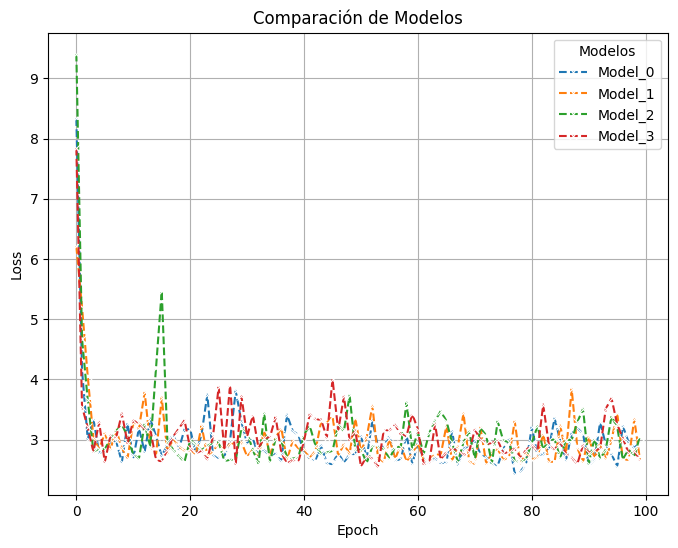

In [294]:

plt.figure(figsize=(8,6))
sns.lineplot(data=hist_t, x='epoch', y='val_loss', hue='model', linestyle='dashed', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

Las diferencias entre los modelos fueron mínimas, por lo que no se puede observar en la escala normal. Para esto, se graficó la diferencia entre cada modelo modificado con el original, generando los siguientes resultados.

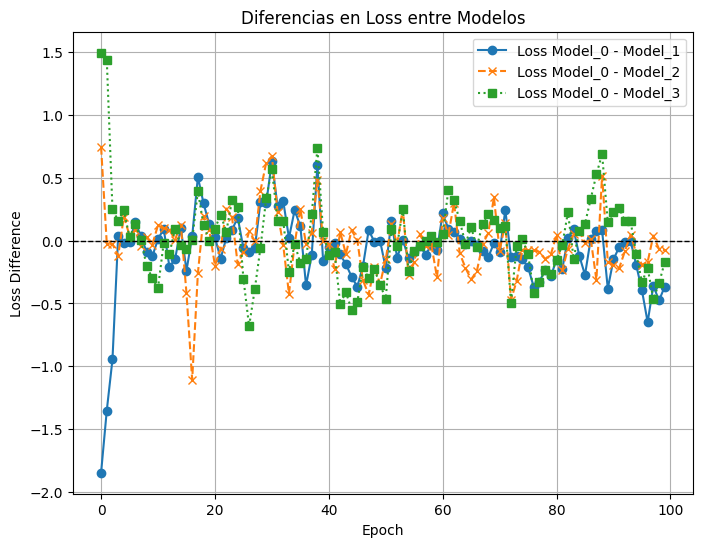

In [295]:



#Calcular las diferencias entre modelos
diff01 = hist['loss'] - hist1['loss']
diff02 = hist['loss'] - hist2['loss']
diff03 = hist['loss'] - hist3['loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='Loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='Loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='Loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.title('Diferencias en Loss entre Modelos')
plt.legend()
plt.grid(True)
plt.show()


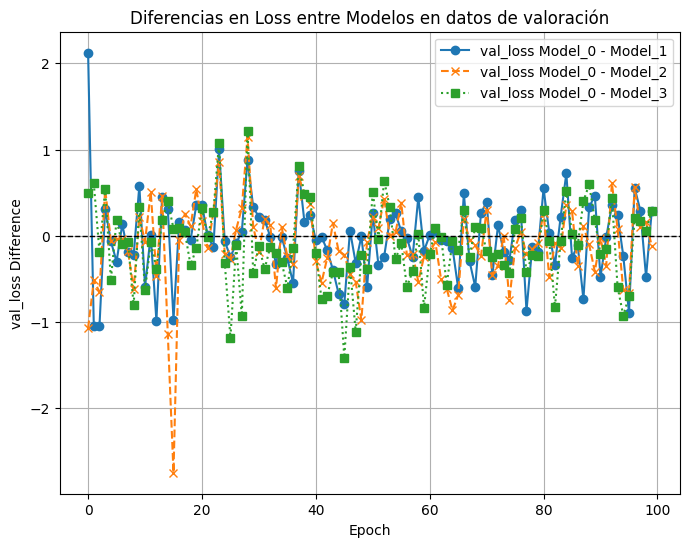

In [296]:


#Calcular las diferencias entre modelos
diff01 = hist['val_loss'] - hist1['val_loss']
diff02 = hist['val_loss'] - hist2['val_loss']
diff03 = hist['val_loss'] - hist3['val_loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='val_loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='val_loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='val_loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('val_loss Difference')
plt.title('Diferencias en Loss entre Modelos en datos de valoración')
plt.legend()
plt.grid(True)
plt.show()


In [297]:
modelo0.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
model3_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
model3_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
model3_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Validación con datos de test

In [298]:
dict_test={}
dict_test['Modelo_0']=modelo0.evaluate(
    test_X,
    test_y, verbose=0
)
dict_test['Modelo_1']=model3_1.evaluate(
    test_X,
    test_y, verbose=0
)
dict_test['Modelo_2']=model3_2.evaluate(
    test_X,
    test_y, verbose=0
)
dict_test['Modelo_3']=model3_3.evaluate(
    test_X,
    test_y, verbose=0
)
dict_test

{'Modelo_0': 2.752246141433716,
 'Modelo_1': 2.7016069889068604,
 'Modelo_2': 2.7410736083984375,
 'Modelo_3': 2.682985544204712}